In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df= pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [4]:
df.shape

(10000, 14)

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.duplicated().sum()

0

In [10]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [11]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [14]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [15]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [17]:
df=pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [21]:
X=df.drop(columns='Exited')
y=df['Exited']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [27]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [63]:
model=Sequential()

model.add(Dense(5, activation='relu', input_dim=11))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [64]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 5)                 60        
                                                                 
 dense_6 (Dense)             (None, 5)                 30        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [66]:
history=model.fit(X_train_scaled, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
200/200 [==============================] - 2s 5ms/step - loss: 0.6032 - accuracy: 0.7102 - val_loss: 0.4869 - val_accuracy: 0.8006
Epoch 2/20
200/200 [==============================] - 1s 4ms/step - loss: 0.4744 - accuracy: 0.7953 - val_loss: 0.4563 - val_accuracy: 0.8006
Epoch 3/20
200/200 [==============================] - 1s 4ms/step - loss: 0.4568 - accuracy: 0.7958 - val_loss: 0.4447 - val_accuracy: 0.8025
Epoch 4/20
200/200 [==============================] - 1s 3ms/step - loss: 0.4462 - accuracy: 0.8012 - val_loss: 0.4365 - val_accuracy: 0.8025
Epoch 5/20
200/200 [==============================] - 1s 4ms/step - loss: 0.4390 - accuracy: 0.8041 - val_loss: 0.4306 - val_accuracy: 0.8131
Epoch 6/20
200/200 [==============================] - 1s 3ms/step - loss: 0.4339 - accuracy: 0.8114 - val_loss: 0.4259 - val_accuracy: 0.8194
Epoch 7/20
200/200 [==============================] - 1s 4ms/step - loss: 0.4292 - accuracy: 0.8169 - val_loss: 0.4216 - val_accuracy: 0.8225
Epoch 

In [67]:
model.layers[0].get_weights()

[array([[ 0.19708818,  0.05799828,  0.08098604,  0.06989025, -0.3677775 ],
        [-0.73599946,  0.702682  ,  0.55818015,  0.19694415, -0.78804815],
        [-0.00564698, -0.1983766 ,  0.07463365,  0.03665664, -0.12837203],
        [-0.18458585,  0.11793953, -0.07825417, -0.35210052, -0.29393655],
        [-0.12790732,  0.7523504 , -0.23885833, -1.0500367 ,  0.01032053],
        [-0.03745298,  0.02045175,  0.13596694, -0.01400071, -0.09409133],
        [-0.36509234, -0.2980133 ,  0.8881917 , -0.25387383,  0.6955382 ],
        [ 0.06810542,  0.13400693, -0.00423084,  0.00566008, -0.05345622],
        [-0.15028846, -0.1305419 , -0.2965075 ,  0.183194  , -0.1380051 ],
        [-0.06864753, -0.06339066,  0.17453572,  0.0107063 , -0.4797584 ],
        [ 0.02153571, -0.13358559,  0.10432003, -0.04782855,  0.5352965 ]],
       dtype=float32),
 array([ 0.9718466 , -0.08489277, -0.08143349,  0.08423766,  0.4313375 ],
       dtype=float32)]

In [68]:
y_log=model.predict(X_test_scaled)

63/63 [==============================] - 0s 3ms/step


In [69]:
y_pred=np.where(y_log>0.5, 1, 0)

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8525

In [71]:
history.history

{'loss': [0.6032106876373291,
  0.4744437038898468,
  0.45679545402526855,
  0.44620829820632935,
  0.4390128254890442,
  0.4339160621166229,
  0.429220050573349,
  0.4250376224517822,
  0.4210146963596344,
  0.4174821078777313,
  0.4138754904270172,
  0.4104730188846588,
  0.4065314531326294,
  0.40223342180252075,
  0.3974381685256958,
  0.39197760820388794,
  0.3868228793144226,
  0.38070353865623474,
  0.37432804703712463,
  0.3682463467121124],
 'accuracy': [0.710156261920929,
  0.7953125238418579,
  0.7957812547683716,
  0.8012499809265137,
  0.8040624856948853,
  0.8114062547683716,
  0.8168749809265137,
  0.8214062452316284,
  0.8251562714576721,
  0.8279687762260437,
  0.8310937285423279,
  0.8318750262260437,
  0.8354687690734863,
  0.8364062309265137,
  0.8373437523841858,
  0.8399999737739563,
  0.842968761920929,
  0.8446875214576721,
  0.84765625,
  0.8518750071525574],
 'val_loss': [0.48688724637031555,
  0.45632269978523254,
  0.44471636414527893,
  0.4365256130695343,


In [72]:
import matplotlib.pyplot as plt

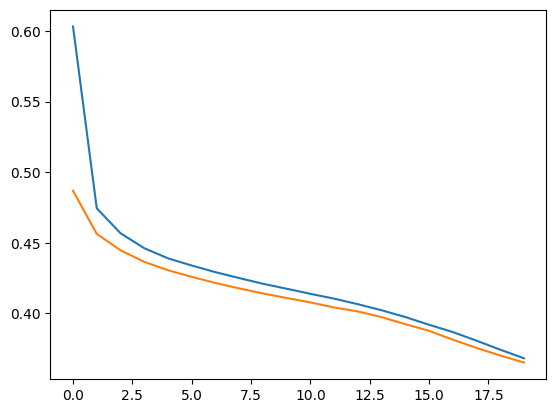

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

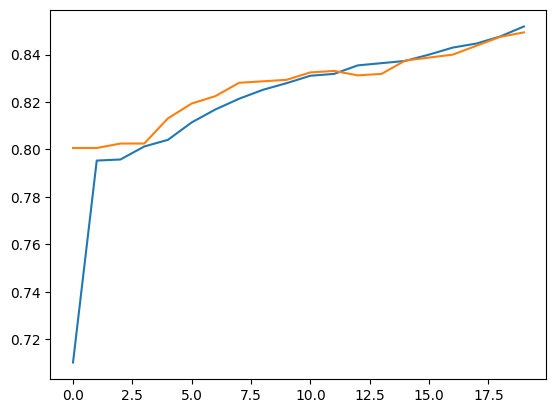

In [74]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])